<a href="https://colab.research.google.com/github/NurAyuL27/PCVK_Genap_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PERCOBAAN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan:50


/tmp/ipython-input-847751871.py:14: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


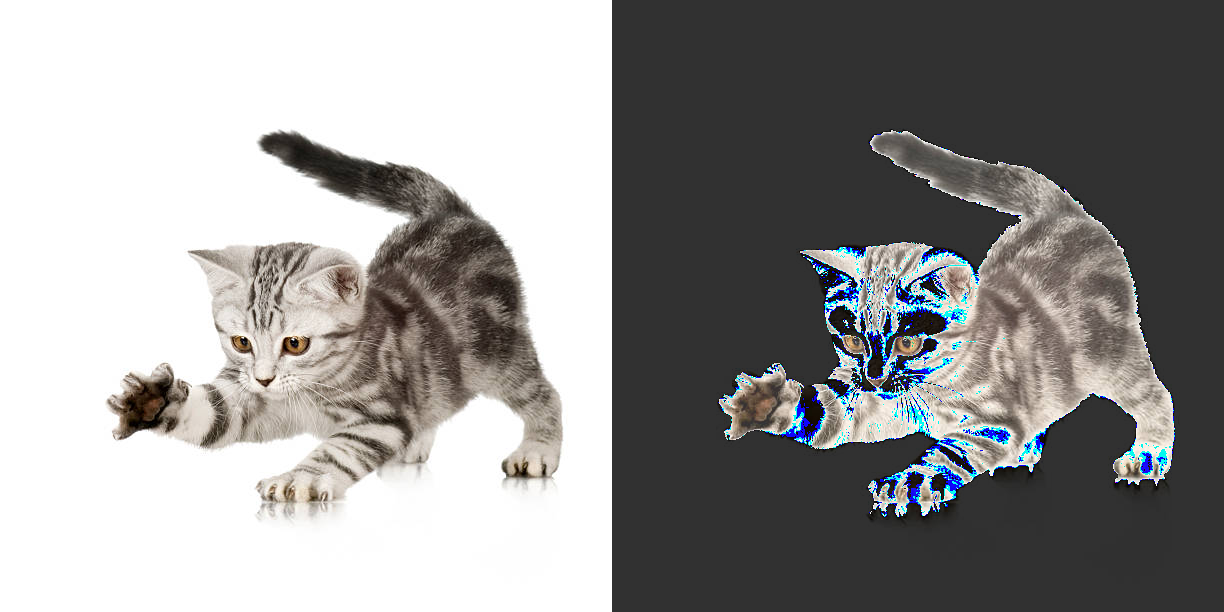

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/kitten.jpg')
brightness_image = np.zeros(original.shape, original.dtype)
#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)
#cara simple tanpa for loop
#brightness_image cv.convertScaleAbs(original, beta-brightness)
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **TUGAS**

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [52]:
# Memuat citra
original = cv.imread('//content/drive/MyDrive/bekantan.jpg')
if original is None:
    raise Exception("Gagal memuat citra. Periksa path file.")

In [53]:
# Konversi BGR ke RGB untuk tampilan yang benar
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

**1. Operasi Kecerahan Linear**

Mengubah citra menjadi invers (negatif)


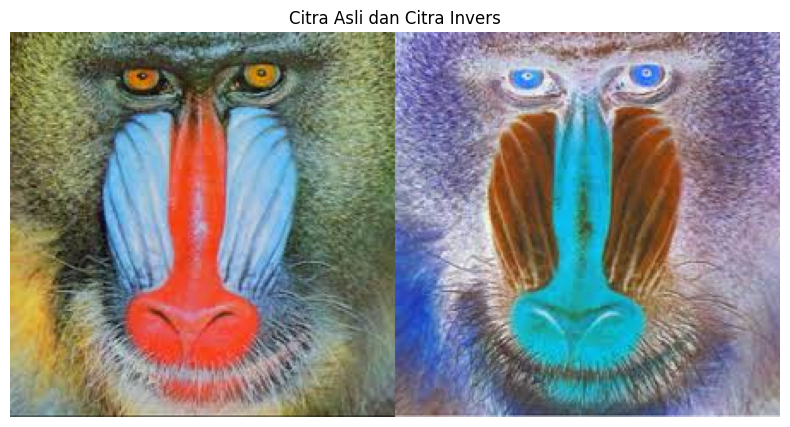

In [54]:
# Formula: g(x,y) = 255 - f(x,y)
print('Mengubah citra menjadi invers (negatif)')
inverse_image = 255 - original_rgb
# Menampilkan citra asli dan invers secara berdampingan
final_frame_inverse = cv.hconcat((original_rgb, inverse_image))
plt.figure(figsize=(10, 5))
plt.imshow(final_frame_inverse)
plt.title('Citra Asli dan Citra Invers')
plt.axis('off')
plt.show()

**2. Operasi Kontras**

Mengubah kontras dan tingkat kecerahan citra
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


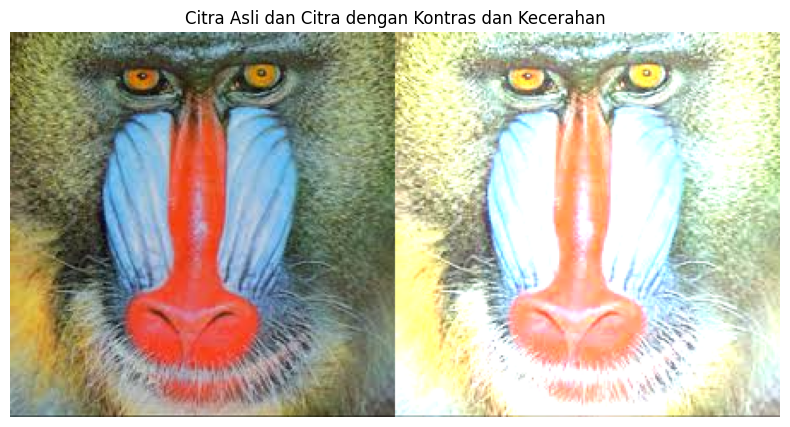

In [55]:
# Formula: g(x,y) = contrast_factor * f(x,y) + brightness
print('Mengubah kontras dan tingkat kecerahan citra')
try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    if brightness < -255 or brightness > 255:
        raise ValueError("Kecerahan harus dalam rentang -255 hingga 255")
except ValueError:
    print('Error, masukkan angka yang valid untuk kecerahan.')
    brightness = 60  # Default jika input tidak valid

try:
    contrast_factor = float(input('Masukkan kontras [1.0 - 3.0]: '))
    if contrast_factor < 1.0 or contrast_factor > 3.0:
        raise ValueError("Kontras harus dalam rentang 1.0 hingga 3.0")
except ValueError:
    print('Error, masukkan angka yang valid untuk kontras.')
    contrast_factor = 1.5  # Default jika input tidak valid

# Terapkan transformasi kontras dan kecerahan
contrast_image = original_rgb.astype(np.float32) * contrast_factor + brightness
contrast_image = np.clip(contrast_image, 0, 255).astype(np.uint8)
# Menampilkan citra asli dan kontras secara berdampingan
final_frame_contrast = cv.hconcat((original_rgb, contrast_image))
plt.figure(figsize=(10, 5))
plt.imshow(final_frame_contrast)
plt.title('Citra Asli dan Citra dengan Kontras dan Kecerahan')
plt.axis('off')
plt.show()

**3. Operasi Invers Citra**

Mengubah tingkat kecerahan citra dengan Transformasi Log
Masukkan nilai kecerahan: 40


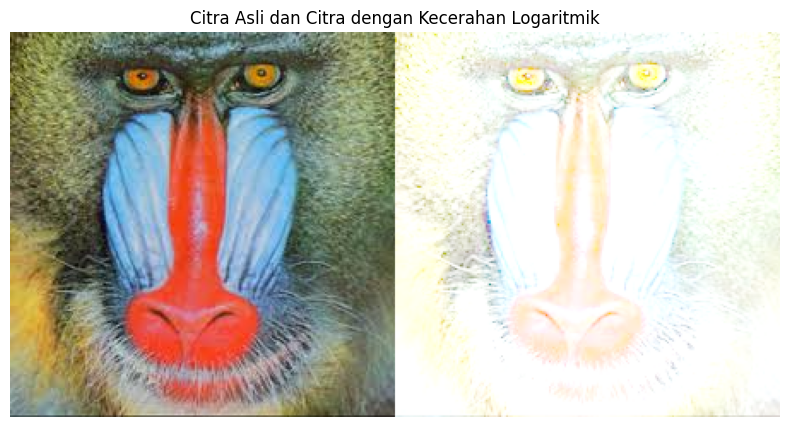

In [56]:
# Formula: g(x,y) = c * log(1 + f(x,y)) + brightness, di mana c = 255 / log(1 + max(f(x,y)))
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, masukkan angka yang valid.')
    brightness = 40  # Default jika input tidak valid

# Perbaikan: Hindari error pembagian dengan nol dan log(0)
max_val = np.max(original_rgb)
if max_val <= 0:
    max_val = 1  # Pastikan nilai maksimum minimal 1

# Perbaikan: Gunakan log1p untuk stabilitas numerik
c = 255 / np.log1p(max_val)

# Terapkan transformasi logaritmik dengan penyesuaian kecerahan
log_image = c * np.log1p(original_rgb.astype(np.float32)) + brightness
log_image = np.clip(log_image, 0, 255).astype(np.uint8)

# Menampilkan citra asli dan logaritmik secara berdampingan
final_frame_log = cv.hconcat((original_rgb, log_image))
plt.figure(figsize=(10, 5))
plt.imshow(final_frame_log)
plt.title('Citra Asli dan Citra dengan Kecerahan Logaritmik')
plt.axis('off')
plt.show()

**4. Transformasi Kecerahan Logaritmik**

**a. Metode Rata-rata**


Alternatif tampilan:


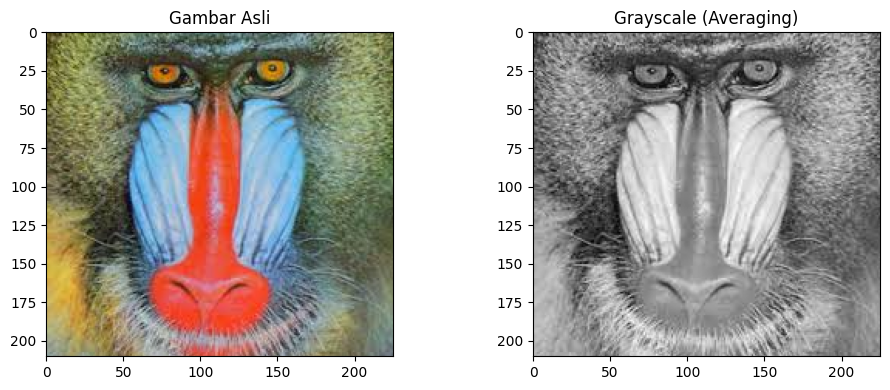

In [59]:
# a. Averaging Method: gray = (R + G + B) / 3
gray_avg = np.mean(original_rgb, axis=2).astype(np.uint8)

# Alternatif: Tampilkan dengan plt.imshow() langsung
print("\nAlternatif tampilan:")
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title('Gambar Asli')
plt.xlim(0, 225)
plt.ylim(210, 0)

plt.subplot(1, 2, 2)
plt.imshow(gray_avg, cmap='gray')
plt.title('Grayscale (Averaging)')
plt.xlim(0, 225)
plt.ylim(210, 0)

plt.tight_layout()
plt.show()

**b. Metode Lightness**


Metode Lightness:


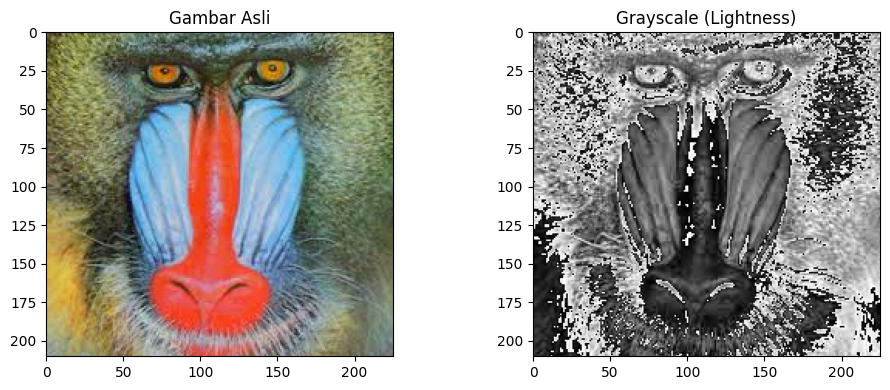

In [60]:
# b. Lightness Method: gray = (max(R,G,B) + min(R,G,B)) / 2
gray_light = ((np.max(original_rgb, axis=2) + np.min(original_rgb, axis=2)) / 2).astype(np.uint8)

# Tampilkan dengan plt.imshow()
print("\nMetode Lightness:")
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title('Gambar Asli')
plt.xlim(0, 225)
plt.ylim(210, 0)

plt.subplot(1, 2, 2)
plt.imshow(gray_light, cmap='gray')
plt.title('Grayscale (Lightness)')
plt.xlim(0, 225)
plt.ylim(210, 0)

plt.tight_layout()
plt.show()

**c. Metode Luminance**


Metode Luminance:


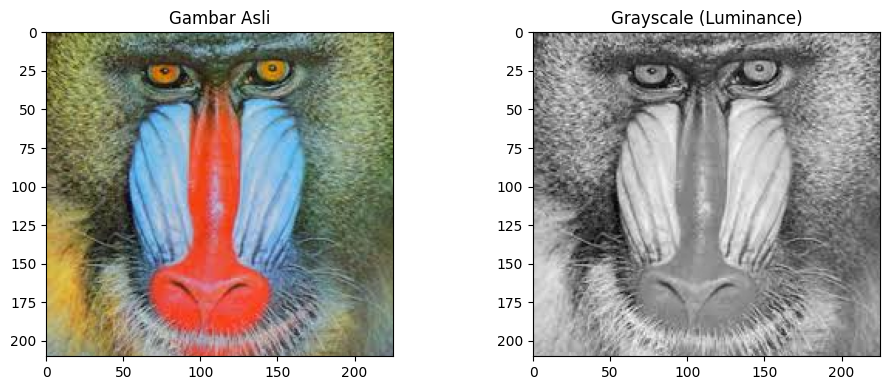

In [72]:
# c. Luminance Method: gray = 0.299R + 0.587G + 0.114B
gray_lum = (0.299 * original_rgb[:,:,0] + 0.587 * original_rgb[:,:,1] + 0.114 * original_rgb[:,:,2]).astype(np.uint8)

# Tampilkan dengan plt.imshow()
print("\nMetode Luminance:")
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title('Gambar Asli')
plt.xlim(0, 225)
plt.ylim(210, 0)

plt.subplot(1, 2, 2)
plt.imshow(gray_lum, cmap='gray')
plt.title('Grayscale (Luminance)')
plt.xlim(0, 225)
plt.ylim(210, 0)

plt.tight_layout()
plt.show()

**5. transform with custom color selection**

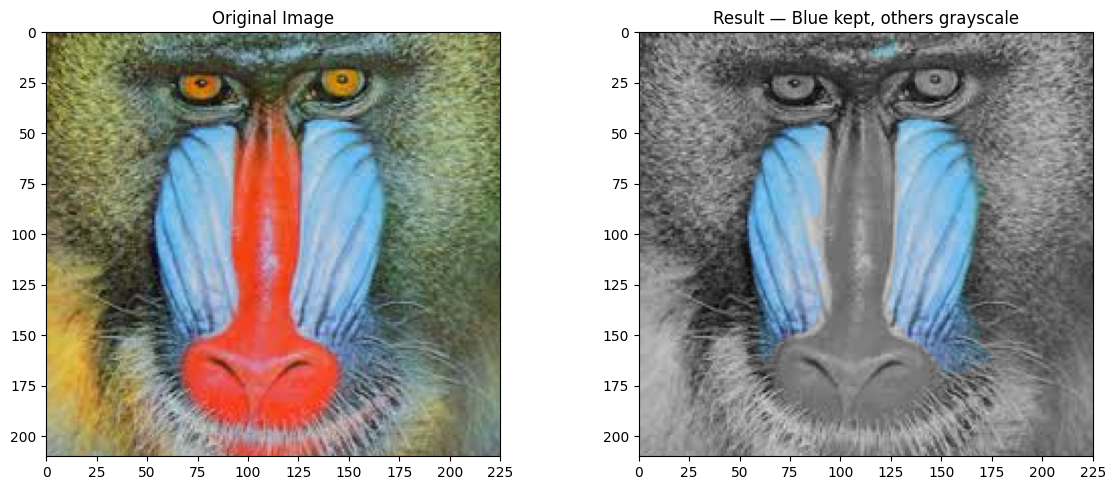

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reload image
img_path = '/content/drive/MyDrive/bekantan.jpg'
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Define HSV range for blue
lower_blue = np.array([80, 50, 50])
upper_blue = np.array([140, 255, 255])

mask = cv2.inRange(hsv, lower_blue, upper_blue)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

# Grayscale
gray_lum = (0.299 * img_rgb[:, :, 0] + 0.587 * img_rgb[:, :, 1] + 0.114 * img_rgb[:, :, 2]).astype(np.uint8)
gray_3d = np.stack((gray_lum, gray_lum, gray_lum), axis=2)

# Combine color and grayscale
result = np.where(mask[:, :, np.newaxis].astype(bool), img_rgb, gray_3d).astype(np.uint8)

# Plot with requested xlim and ylim
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(original_rgb)
plt.title('Original Image')
plt.xlim(0,225)
plt.ylim(210,0)
plt.axis('on')

plt.subplot(1,2,2)
plt.imshow(result)
plt.title('Result — Blue kept, others grayscale')
plt.xlim(0,225)
plt.ylim(210,0)
plt.axis('on')

plt.tight_layout()
plt.show()
